In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None) # default 50
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_dict = pd.read_excel('Leads Data Dictionary.xlsx', header=2)
data_dict = data_dict.iloc[:,1:]
data_dict = data_dict.set_index('Variables')
data_dict = data_dict.fillna(method='ffill')
data_dict

,Description
Variables,
Prospect ID,A unique ID with which the customer is identified.
Lead Number,A lead number assigned to each lead procured.
Lead Origin,"The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc."
Lead Source,"The source of the lead. Includes Google, Organic Search, Olark Chat, etc."
Do Not Email,An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
Do Not Call,An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
Converted,The target variable. Indicates whether a lead has been successfully converted or not.
TotalVisits,The total number of visits made by the customer on the website.
Total Time Spent on Website,The total time spent by the customer on the website.


In [3]:
pd.set_option('display.max_colwidth', 30)
df = pd.read_csv('Leads.csv')

In [4]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6...,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dc...,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fd...,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading ...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19...,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a...,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading ...,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
def value_counts(series: 'pd.Series'):
    """
    Outputs value counts of a pandas Series in the form
    of a nice Dataframe.
    """
    counts = pd.DataFrame(series.value_counts())
    counts_norm = pd.DataFrame(series.value_counts(normalize=True))
    df = pd.merge(counts, counts_norm, left_index=True, right_index=True)
    df.columns = pd.MultiIndex.from_arrays(
        [[series._name, series._name],
         ['Counts', 'Normalised']])
    return df
value_counts(df['City'])

City           
                            Counts Normalised
Mumbai                        3222   0.412020
Select                        2249   0.287596
Thane & Outskirts              752   0.096164
Other Cities                   686   0.087724
Other Cities of Maharashtra    457   0.058440
Other Metro Cities             380   0.048593
Tier II Cities                  74   0.009463

In [8]:
cols = df.columns.drop(['Prospect ID', 'Lead Number'])

In [39]:
import ipywidgets as widgets
from ipywidgets import VBox, HBox, interactive_output
from IPython.display import clear_output
sns.set_theme('notebook', palette='pink')
col = widgets.Dropdown(
        options=cols,
        description='Column',
        disabled=False)
def f(col):
    print(f'Description of {col}')
    print(str(df[col].describe()))
def g(col):
    plt.figure(figsize=(12,5))
    sns.scatterplot(y=df[col].value_counts(),x=df[col].value_counts().index)
    plt.title('Value Counts')
    plt.xticks(rotation=90)
    plt.show()
def h(col):
    def value_counts(series: 'pd.Series'):      # This is strange. If this function is not included
        a = pd.DataFrame(series.value_counts()) # inside h function, the widget gives a TypeError.
        b = pd.DataFrame(series.value_counts(normalize=True))
        df = pd.merge(a, b, left_index=True, right_index=True)
        df.columns = pd.MultiIndex.from_arrays(
            [[series._name, series._name],
             ['Counts', 'Normalised']])
        return df
    display(value_counts(df[col]), )
def i(col):
    try: print(data_dict.loc[col].values[0])
    except: print(col)

def j(col):
    plt.figure(figsize=(12,5))
    plt.xticks(rotation=90)
    sns.histplot(df[col], kde=True)
hist_button = widgets.Button(description='View Distribution')
histogram = widgets.Output()
def on_button_clicked(_):
      with histogram:
          clear_output()
          display(interactive_output(j, {'col':col}))
hist_button.on_click(on_button_clicked)

describe =         interactive_output(f, {'col': col})
value_count_plot = interactive_output(g,{'col':col})
value_counts =     interactive_output(h,{'col':col})
line =             widgets.Output(layout={'border': '1px solid black'})
description =      interactive_output(i, {'col':col})
HBox([VBox([col, describe, line,value_counts],box_style='info'),
      line,
      VBox([description, line,value_count_plot, line, hist_button, histogram]) ])

<AxesSubplot:xlabel='Lead Number', ylabel='Count'>

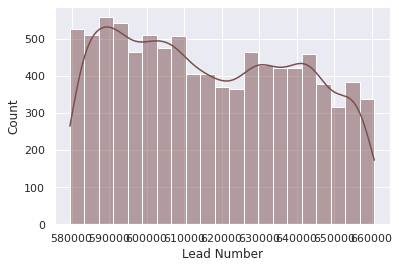

In [25]:
sns.histplot(df['Lead Number'], kde=True)